In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve
import warnings
from sklearn.tree import DecisionTreeClassifier
#ignoring the wrangings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"C:\Users\mohamed\Downloads\data\Admission_Predict_Ver1.1.csv")

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.drop('Serial No.',axis=1,inplace = True)

In [8]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [18]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


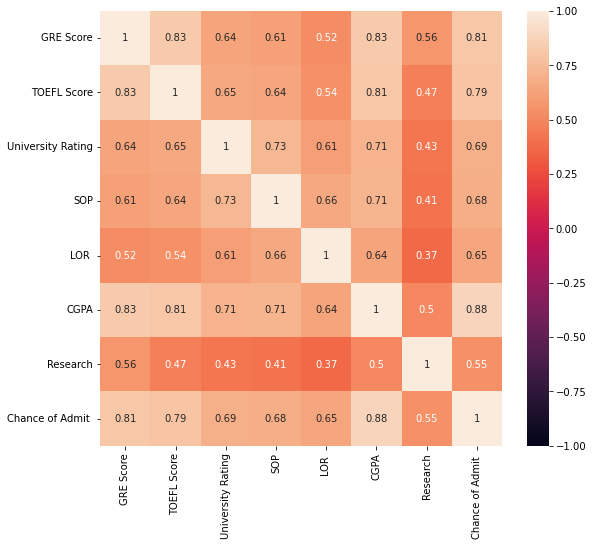

In [11]:
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

<Figure size 648x576 with 0 Axes>

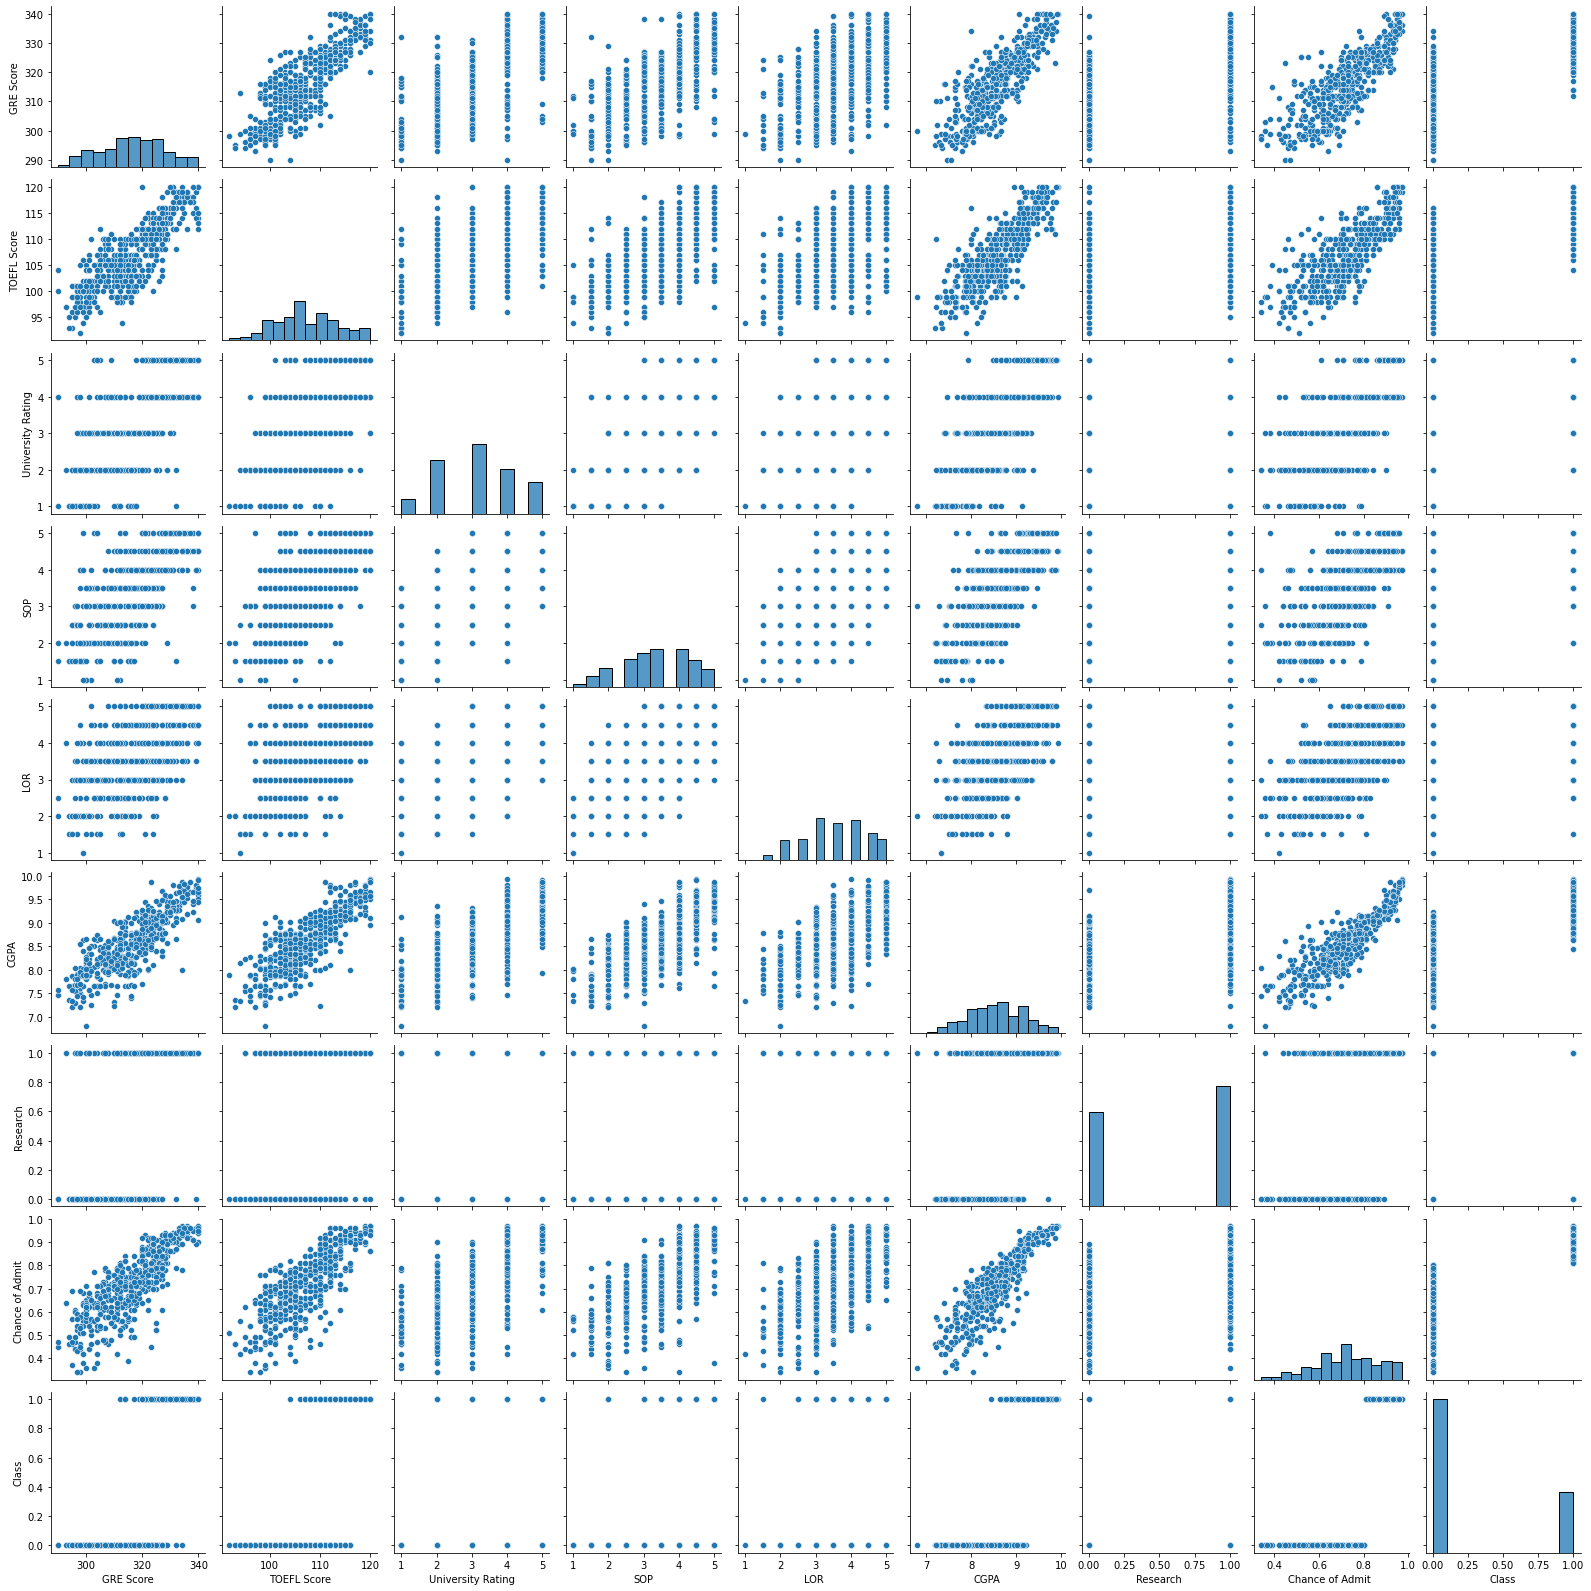

In [31]:
plt.figure(figsize=(9,8))
sns.pairplot(data)
plt.show()

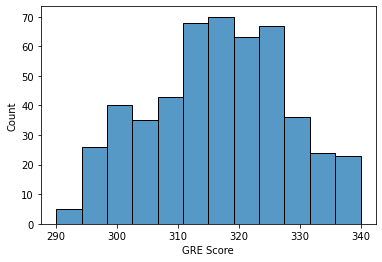

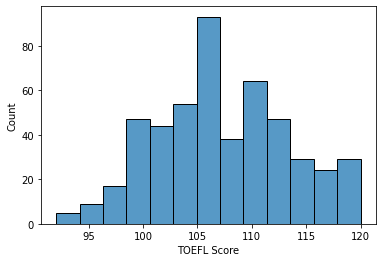

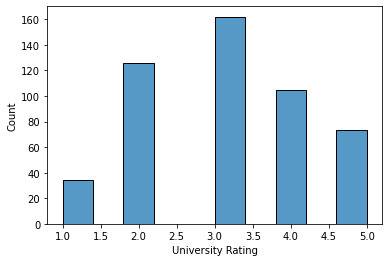

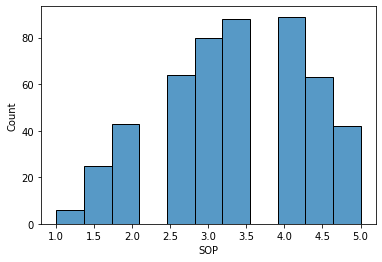

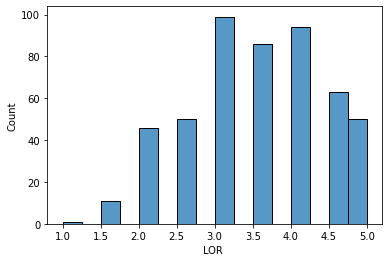

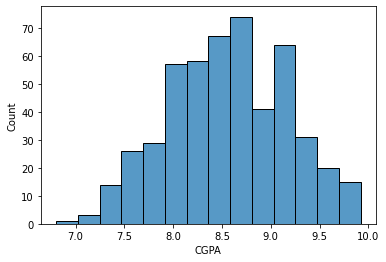

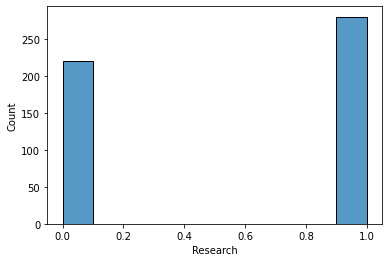

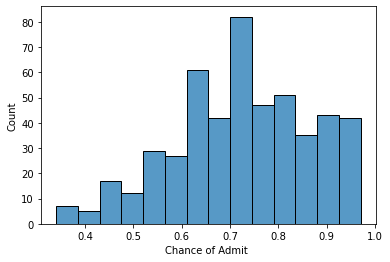

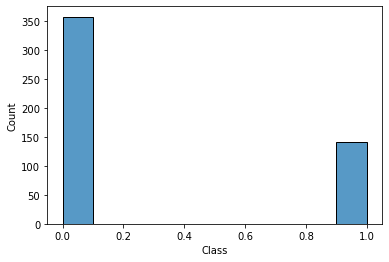

In [30]:
for i in data.columns:
    sns.histplot(data=data,x=i)
    plt.show()
#     print(data[i].value_counts())

In [13]:
data['University Rating'].value_counts(normalize=True)

3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: University Rating, dtype: float64

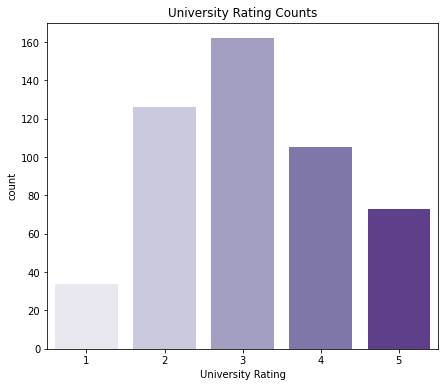

In [35]:
plt.figure(figsize=(7,6))
sns.countplot(data=data,x='University Rating',palette='Purples')
plt.title('University Rating Counts')
plt.show()

In [21]:
Class=data.iloc[:,-1]>=0.8
data['Class']=Class*1
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Class
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,0
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,0
4,314,103,2,2.0,3.0,8.21,0,0.65,0


# Model building

In [25]:
y=data.iloc[:,-1]
x=data.iloc[:,:-2]

In [26]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Class, dtype: int32

In [27]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [43]:
model=DecisionTreeClassifier(max_depth=4, min_samples_split=150)

In [44]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=150)

In [46]:
y_pred=model.predict(x_train)

In [48]:
print(f"Score is {accuracy_score(y_train,y_pred)}")

Score is 0.9285714285714286


In [49]:
model.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=4, min_samples_split=150)

In [51]:
y_pred2=model.predict(x_test)

In [53]:
print(f"Score is {accuracy_score(y_test,y_pred2)}")

Score is 0.94


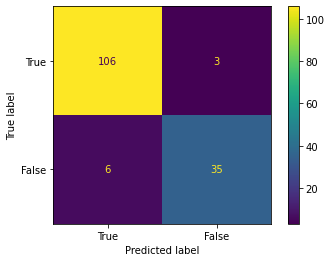

In [56]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred2)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[True,False])
cm_display.plot()
# plt.grid(None)
plt.show()

In [59]:
print("The classification report :")
target_names = ['class 0','class 1']
print(classification_report(y_test, y_pred2,target_names=target_names))

The classification report :
              precision    recall  f1-score   support

     class 0       0.95      0.97      0.96       109
     class 1       0.92      0.85      0.89        41

    accuracy                           0.94       150
   macro avg       0.93      0.91      0.92       150
weighted avg       0.94      0.94      0.94       150



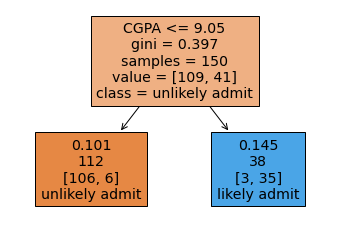

In [62]:
from sklearn import tree
tree.plot_tree(model,
               feature_names = x_train.columns,
               max_depth = 4,
               class_names = ['unlikely admit', 'likely admit'],
               label = 'root',
               filled = True)
plt.show()